# Hamoye Premier Project.

## Group Catboost 

### Dataset Description

> The Association of Tennis Professionals (ATP) is the governing body of the men's professional tennis circuits; this project uses a total of 17 datasets.In these datasets there are individual csv files for ATP tournament from 2000 to 2017.
The numbers in the last columns are absolute values, using them you can calculate percentages.

the following is the naming abbrevations of the column names used in the data.

ace = absolute number of aces

df = number of double faults

svpt = total serve points

1stin = 1st serve in

1st won = points won on 1st serve

2ndwon = points won on 2nd serve

SvGms = serve games

bpSaved = break point saved

bpFaced = break point faced


### Question(s) For Analysis

>- Who is the greatest Tennis player of all time?
>- What makes a great Tennis player?

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import rcParams

%matplotlib inline

In [4]:
#Loading datasets from folder called 'datasets' and merging all csv data
folder_name = '../datasets'
files = glob.glob(os.path.join(folder_name, "*.csv"))
df = pd.concat((pd.read_csv(f, low_memory=False) for f in files), ignore_index = True)

### Preliminary Wrangling

In [5]:
df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,2000-717,Orlando,Clay,32.0,A,20000501.0,1.0,102179.0,NaN,NaN,...,15.0,13.0,4.0,110.0,59.0,49.0,31.0,17.0,4.0,4.0
1,2000-717,Orlando,Clay,32.0,A,20000501.0,2.0,103602.0,NaN,Q,...,6.0,0.0,0.0,57.0,24.0,13.0,17.0,10.0,4.0,9.0
2,2000-717,Orlando,Clay,32.0,A,20000501.0,3.0,103387.0,NaN,NaN,...,0.0,2.0,2.0,65.0,39.0,22.0,10.0,8.0,6.0,10.0
3,2000-717,Orlando,Clay,32.0,A,20000501.0,4.0,101733.0,NaN,NaN,...,12.0,4.0,6.0,104.0,57.0,35.0,24.0,15.0,6.0,11.0
4,2000-717,Orlando,Clay,32.0,A,20000501.0,5.0,101727.0,4.0,NaN,...,1.0,0.0,3.0,47.0,28.0,17.0,10.0,8.0,3.0,6.0


In [6]:
df.shape

(53571, 49)

In [7]:
# we need to drop the date, winner id
df.describe()


,draw_size,tourney_date,match_num,winner_id,winner_seed,winner_ht,winner_age,winner_rank,winner_rank_points,loser_id,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
count,53508.000000,5.350800e+04,53508.000000,53508.000000,22305.000000,50001.000000,53490.000000,52432.000000,52432.000000,53508.000000,...,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000,47740.000000
mean,53.244431,2.007903e+07,38.743029,104044.714005,7.262990,185.624308,26.030216,82.360047,1523.461913,104182.875458,...,5.040008,4.997947,3.384311,80.471093,47.857750,31.845140,14.994009,12.218789,4.767176,8.646732
std,38.951310,4.938173e+04,59.206285,2338.649843,6.669687,6.793573,3.657063,146.217219,1998.389560,3324.481911,...,4.035421,4.773229,2.529890,29.170992,19.135274,14.292082,7.277628,4.220815,3.259114,4.128620
min,4.000000,2.000010e+07,1.000000,100644.000000,1.000000,163.000000,15.715264,1.000000,1.000000,100644.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,2.004012e+07,8.000000,103252.000000,3.000000,180.000000,23.362081,17.000000,535.000000,103171.000000,...,2.000000,2.000000,2.000000,59.000000,34.000000,22.000000,10.000000,9.000000,2.000000,6.000000
50%,32.000000,2.008030e+07,20.000000,103909.000000,5.000000,185.000000,25.937029,44.000000,893.000000,103908.000000,...,4.000000,4.000000,3.000000,75.000000,45.000000,30.000000,14.000000,11.000000,4.000000,8.000000
75%,64.000000,2.012062e+07,39.000000,104676.000000,9.000000,190.000000,28.560575,86.000000,1615.000000,104678.000000,...,7.000000,7.000000,5.000000,96.000000,58.000000,40.000000,19.000000,15.000000,7.000000,11.000000
max,128.000000,2.017020e+07,319.000000,202382.000000,35.000000,208.000000,39.627652,2101.000000,16950.000000,202359.000000,...,30.000000,103.000000,23.000000,489.000000,328.000000,284.000000,101.000000,91.000000,25.000000,34.000000


## Quality Issues

- Bad date format/datatype
- Bad data types for winner_age, winner_rank, and winner_rank_points columns
- null values present


In [8]:
# changing tourney_date format and datatype
df['tourney_date'] = df['tourney_date'].astype(str).apply(lambda x: pd.to_datetime(x, format='%Y%m%d', errors= 'coerce'))

In [9]:
#displays entire column of the dataframe
pd.set_option('display.max.column', None)

In [10]:
df.sample(15)

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,loser_id,loser_seed,loser_entry,loser_name,loser_hand,loser_ht,loser_ioc,loser_age,loser_rank,loser_rank_points,score,best_of,round,minutes,w_ace,w_df,w_svpt,w_1stIn,w_1stWon,w_2ndWon,w_SvGms,w_bpSaved,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
11113,2003-496,Marseille,Hard,32.0,A,2003-02-10,22.0,103103.0,NaN,NaN,Dominik Hrbaty,R,183.0,SVK,25.100616,56.0,682.0,103133.0,NaN,NaN,Olivier Mutis,R,175.0,FRA,25.021218,100.0,404.0,6-3 6-4,3.0,R16,73.0,8.0,1.0,59.0,40.0,27.0,16.0,10.0,0.0,0.0,6.0,4.0,86.0,43.0,30.0,20.0,9.0,8.0,10.0
22566,2006-605,Masters Cup,Hard,8.0,F,2006-11-13,3.0,103819.0,NaN,NaN,Roger Federer,R,185.0,SUI,25.264887,1.0,7620.0,103344.0,NaN,NaN,Ivan Ljubicic,R,193.0,CRO,27.655031,4.0,2395.0,7-6(2) 6-4,3.0,RR,94.0,7.0,0.0,67.0,44.0,33.0,15.0,11.0,5.0,6.0,8.0,2.0,67.0,35.0,29.0,12.0,11.0,2.0,4.0
34099,2010-520,Roland Garros,Clay,128.0,G,2010-05-24,62.0,104797.0,NaN,NaN,Denis Istomin,R,188.0,UZB,23.709788,72.0,660.0,103794.0,NaN,NaN,Benjamin Becker,R,178.0,GER,28.936345,53.0,849.0,7-5 7-5 6-3,5.0,R128,127.0,12.0,2.0,90.0,58.0,45.0,20.0,17.0,4.0,6.0,9.0,4.0,97.0,62.0,40.0,17.0,16.0,4.0,9.0
39512,2012-403,Miami Masters,Hard,96.0,M,2012-03-21,20.0,103900.0,NaN,NaN,David Nalbandian,R,180.0,ARG,30.212183,50.0,880.0,104327.0,NaN,NaN,Steve Darcis,R,178.0,BEL,28.016427,68.0,735.0,6-4 7-6(0),3.0,R128,116.0,2.0,5.0,84.0,50.0,32.0,15.0,11.0,5.0,9.0,2.0,1.0,84.0,48.0,27.0,16.0,11.0,9.0,14.0
24763,2007-439,Umag,Clay,32.0,A,2007-07-23,14.0,103105.0,NaN,NaN,Ruben Ramirez Hidalgo,R,183.0,ESP,29.541410,108.0,395.0,103292.0,NaN,NaN,Gaston Gaudio,R,175.0,ARG,28.618754,117.0,360.0,6-0 6-4,3.0,R32,74.0,4.0,2.0,44.0,31.0,21.0,9.0,8.0,1.0,2.0,0.0,2.0,54.0,29.0,14.0,11.0,8.0,1.0,6.0
11162,2003-773,Bucharest,Clay,32.0,A,2003-09-08,9.0,103252.0,8.0,NaN,Alberto Martin,R,175.0,ESP,25.051335,59.0,633.0,103133.0,NaN,NaN,Olivier Mutis,R,175.0,FRA,25.596167,93.0,413.0,6-3 6-2,3.0,R32,68.0,1.0,3.0,53.0,30.0,22.0,12.0,9.0,2.0,4.0,0.0,4.0,52.0,29.0,17.0,8.0,8.0,4.0,9.0
30023,2009-407,Rotterdam,Hard,32.0,A,2009-02-09,8.0,104792.0,5.0,NaN,Gael Monfils,R,193.0,FRA,22.442163,12.0,3190.0,104219.0,NaN,Q,Stephane Bohli,R,185.0,SUI,25.546886,154.0,548.0,6-4 1-0 RET,3.0,R32,42.0,2.0,2.0,36.0,16.0,13.0,10.0,5.0,1.0,1.0,5.0,0.0,29.0,16.0,12.0,7.0,6.0,1.0,3.0
4469,2001-451,Doha,Hard,32.0,A,2001-01-01,14.0,103018.0,NaN,NaN,Max Mirnyi,R,196.0,BLR,23.490760,NaN,NaN,102184.0,NaN,NaN,David Prinosil,R,185.0,GER,27.816564,NaN,NaN,7-6(4) 6-4,3.0,R32,90.0,10.0,3.0,67.0,45.0,33.0,12.0,11.0,1.0,3.0,6.0,3.0,80.0,35.0,27.0,18.0,11.0,3.0,6.0
7548,2002-438,Moscow,Carpet,32.0,A,2002-09-30,29.0,103908.0,NaN,Q,Paul Henri Mathieu,R,185.0,FRA,20.714579,83.0,477.0,103498.0,1.0,NaN,Marat Safin,R,193.0,RUS,22.674880,4.0,2580.0,7-6(3) 6-4,3.0,SF,100.0,6.0,2.0,80.0,38.0,30.0,21.0,11.0,13.0,15.0,13.0,3.0,74.0,44.0,28.0,17.0,11.0,3.0,6.0
38038,2011-D005,Davis Cup G2 R1: MAR vs BIH,Clay,4.0,D,2011-03-04,1.0,105149.0,NaN,NaN,Reda El Amrani,R,185.0,MAR,22.778919,201.0,261.0,104025.0,NaN,NaN,Amer Delic,R,196.0,BIH,28.665298,446.0,76.0,6-2 7-6(4) 6-4,5.0,RR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53571 entries, 0 to 53570
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tourney_id          53508 non-null  object        
 1   tourney_name        53508 non-null  object        
 2   surface             53390 non-null  object        
 3   draw_size           53508 non-null  float64       
 4   tourney_level       53508 non-null  object        
 5   tourney_date        53508 non-null  datetime64[ns]
 6   match_num           53508 non-null  float64       
 7   winner_id           53508 non-null  float64       
 8   winner_seed         22305 non-null  float64       
 9   winner_entry        6210 non-null   object        
 10  winner_name         53508 non-null  object        
 11  winner_hand         53494 non-null  object        
 12  winner_ht           50001 non-null  float64       
 13  winner_ioc          53508 non-null  object    

In [12]:
# dropping unnecessary columns we won't be needing for this project
columns = ['tourney_name', 'surface', 'tourney_level', 'tourney_date', 'match_num', 'winner_name', 'winner_hand',
           'winner_ht', 'winner_ioc', 'winner_age', 'w_bpFaced', 'winner_rank', 'winner_rank_points', 'round', 'minutes', 'w_ace', 'w_df', 'w_1stIn', 'w_1stWon', 'w_2ndWon']
for i in df.columns:
    if i in columns:
        pass
    else:
        df.drop(i, axis=1, inplace = True)

In [13]:
df.sample(10)

,tourney_name,surface,tourney_level,tourney_date,match_num,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,round,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpFaced
47485,Barcelona,Clay,A,2015-04-20,23.0,Tommy Robredo,R,180.0,ESP,32.969199,20.0,1720.0,R32,59.0,7.0,1.0,35.0,28.0,12.0,1.0
49682,Basel,Hard,A,2015-10-26,5.0,Kevin Anderson,R,203.0,RSA,29.440110,12.0,2565.0,R32,NaN,14.0,2.0,30.0,30.0,6.0,0.0
14395,St. Petersburg,Carpet,A,2004-10-25,2.0,Sargis Sargsian,R,180.0,ARM,31.394935,84.0,485.0,R32,99.0,7.0,3.0,51.0,36.0,17.0,5.0
44912,Barcelona,Clay,A,2014-04-21,25.0,Tommy Robredo,R,180.0,ESP,31.972621,18.0,1980.0,R32,82.0,1.0,0.0,43.0,30.0,9.0,5.0
9450,Casablanca,Clay,A,2002-04-08,27.0,Mikhail Youzhny,R,183.0,RUS,19.786448,75.0,541.0,QF,98.0,1.0,1.0,58.0,41.0,8.0,6.0
26489,Bucharest,Clay,A,2008-09-08,26.0,Carlos Moya,R,190.0,ESP,32.032854,61.0,665.0,QF,154.0,10.0,3.0,58.0,44.0,22.0,2.0
5016,St. Poelten,Clay,A,2001-05-21,14.0,Karol Kucera,R,188.0,SVK,27.214237,83.0,490.0,R32,91.0,3.0,5.0,37.0,28.0,18.0,10.0
18010,Nottingham,Grass,A,2005-06-13,9.0,Paradorn Srichaphan,R,185.0,THA,25.998631,37.0,915.0,R32,66.0,6.0,1.0,35.0,28.0,9.0,2.0
24904,Sydney,Hard,A,2007-01-08,31.0,James Blake,R,185.0,USA,27.030801,5.0,2530.0,F,122.0,3.0,4.0,59.0,41.0,18.0,15.0
46097,Munich,Clay,A,2014-04-28,21.0,Fabio Fognini,R,178.0,ITA,26.929500,15.0,2190.0,QF,69.0,2.0,0.0,32.0,18.0,7.0,4.0


In [14]:
# rounding values of the defined columns to it's whole numbers
cols = ['winner_age', 'winner_ht', 'winner_rank', 'winner_rank_points']
df[cols] = df[cols].apply(np.round)

In [15]:
df.isna().sum()

tourney_name            63
surface                181
tourney_level           63
tourney_date            63
match_num               63
winner_name             63
winner_hand             77
winner_ht             3570
winner_ioc              63
winner_age              81
winner_rank           1139
winner_rank_points    1139
round                   63
minutes               7065
w_ace                 5831
w_df                  5831
w_1stIn               5831
w_1stWon              5831
w_2ndWon              5831
w_bpFaced             5831
dtype: int64

In [16]:
#dropping nulls
df.dropna(inplace=True)

In [17]:
#converting cols datatype to int
df[cols] = df[cols].astype(int)

In [18]:
#checking if null values still exist in the dataframe
assert df.all().isna().sum() == 0

In [19]:
# changing winner hand to category since it's just two observations; L and R
df['winner_hand'] = df['winner_hand'].astype('category')

In [20]:
df['winner_hand'].dtype

CategoricalDtype(categories=['L', 'R'], ordered=False)

In [21]:
df.describe()

,match_num,winner_ht,winner_age,winner_rank,winner_rank_points,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpFaced
count,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000,44310.000000
mean,40.813699,185.651704,26.219567,56.963123,1612.563236,104.451659,6.803679,2.626269,47.225818,35.706048,16.731234,5.039517
std,56.857096,6.750664,3.586402,68.830520,2020.629593,40.308286,5.435062,2.272073,18.792436,13.445849,7.070905,4.034746
min,1.000000,163.000000,16.000000,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,180.000000,24.000000,16.000000,590.000000,75.000000,3.000000,1.000000,34.000000,26.000000,12.000000,2.000000
50%,23.000000,185.000000,26.000000,40.000000,945.000000,97.000000,6.000000,2.000000,44.000000,33.000000,16.000000,4.000000
75%,43.000000,190.000000,29.000000,76.000000,1705.000000,126.000000,9.000000,4.000000,57.000000,43.000000,21.000000,7.000000
max,319.000000,208.000000,38.000000,1554.000000,16950.000000,1146.000000,113.000000,23.000000,361.000000,292.000000,82.000000,29.000000


In [22]:
df.sample(10)

,tourney_name,surface,tourney_level,tourney_date,match_num,winner_name,winner_hand,winner_ht,winner_ioc,winner_age,winner_rank,winner_rank_points,round,minutes,w_ace,w_df,w_1stIn,w_1stWon,w_2ndWon,w_bpFaced
24210,Los Angeles,Hard,A,2007-07-16,15.0,Paul Goldstein,R,178,USA,31,97,446,R32,115.0,1.0,4.0,73.0,49.0,13.0,11.0
34459,Bastad,Clay,A,2010-07-12,16.0,Pablo Cuevas,R,180,URU,25,64,755,R16,80.0,5.0,1.0,37.0,30.0,9.0,0.0
6042,Umag,Clay,A,2001-07-16,26.0,David Nalbandian,R,180,ARG,20,111,388,QF,75.0,2.0,0.0,39.0,23.0,6.0,5.0
40659,Estoril,Clay,A,2012-04-30,27.0,Juan Martin Del Potro,R,198,ARG,24,12,2495,F,87.0,6.0,2.0,31.0,24.0,12.0,0.0
38533,Rotterdam,Hard,A,2012-02-13,30.0,Juan Martin Del Potro,R,198,ARG,23,10,2585,SF,75.0,9.0,2.0,26.0,23.0,10.0,3.0
36654,Basel,Hard,A,2011-10-31,4.0,Marcos Baghdatis,R,183,CYP,26,59,805,R32,163.0,6.0,2.0,60.0,43.0,28.0,11.0
45318,Australian Open,Hard,G,2014-01-13,34.0,Kenny De Schepper,L,203,FRA,27,86,617,R128,162.0,19.0,13.0,84.0,63.0,20.0,13.0
43294,Indian Wells Masters,Hard,M,2013-03-07,50.0,Florian Mayer,R,190,GER,29,27,1240,R64,70.0,2.0,3.0,38.0,27.0,8.0,4.0
29423,Johannesburg,Hard,A,2009-02-02,6.0,Leonardo Mayer,R,188,ARG,22,112,813,R32,77.0,8.0,4.0,29.0,26.0,10.0,1.0
19933,Valencia,Clay,A,2006-04-10,12.0,Nicolas Almagro,R,183,ESP,21,77,497,R32,160.0,5.0,5.0,69.0,50.0,22.0,8.0


In [23]:
df.shape

(44310, 20)

In [ ]:
df.to_csv('wrangled_data.csv', index=False)

## Univariate analysis

Text(0, 0.5, 'count [tourney]')

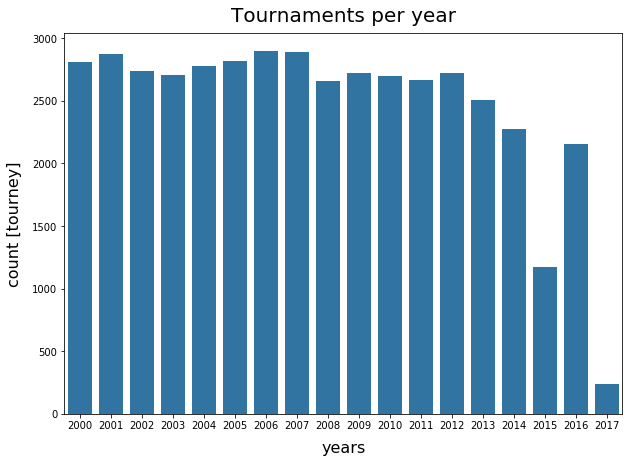

In [24]:
rcParams['figure.figsize'] = 10, 7

base_color = sns.color_palette()[0]
sns.countplot(data=df, x=df['tourney_date'].dt.to_period('Y'), color=base_color)
plt.title('Tournaments per year', fontsize=20, y=1.015)
plt.xlabel('years', labelpad=10, fontsize=16)
plt.ylabel('count [tourney]', labelpad=10, fontsize=16)

Text(0, 0.5, 'count [tourney]')

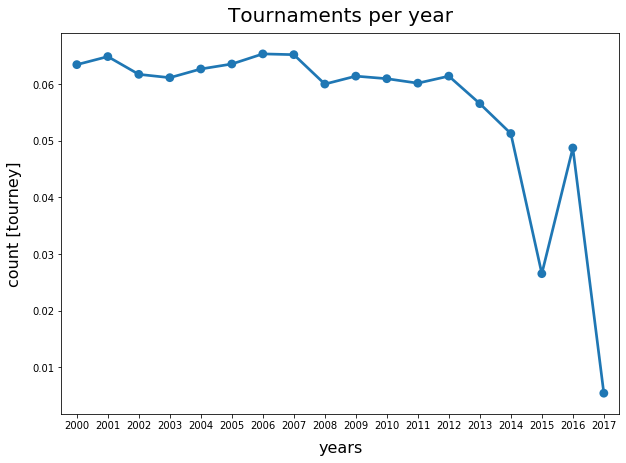

In [25]:
rcParams['figure.figsize'] = 10, 7
events = (df['tourney_date'].dt.to_period('Y').value_counts().sort_index())/df.shape[0]
base_color = sns.color_palette()[0]
sns.pointplot(x=events.index, y= events.values, color=base_color)
plt.title('Tournaments per year', fontsize=20, y=1.015)
plt.xlabel('years', labelpad=10, fontsize=16)
plt.ylabel('count [tourney]', labelpad=10, fontsize=16)

In [26]:
# Payer with most win
DF=df.groupby('winner_name')['winner_name'].count().sort_values(ascending= False)
Df=DF.head(10)
Df=pd.DataFrame(Df)
Df

,winner_name
winner_name,
Roger Federer,984
Rafael Nadal,759
Novak Djokovic,689
David Ferrer,650
Andy Murray,581
Andy Roddick,575
Tomas Berdych,531
Lleyton Hewitt,511
Tommy Robredo,495


Text(0.5, 1.0, 'Total number of wins of top ten winners from 2000 to 2017')

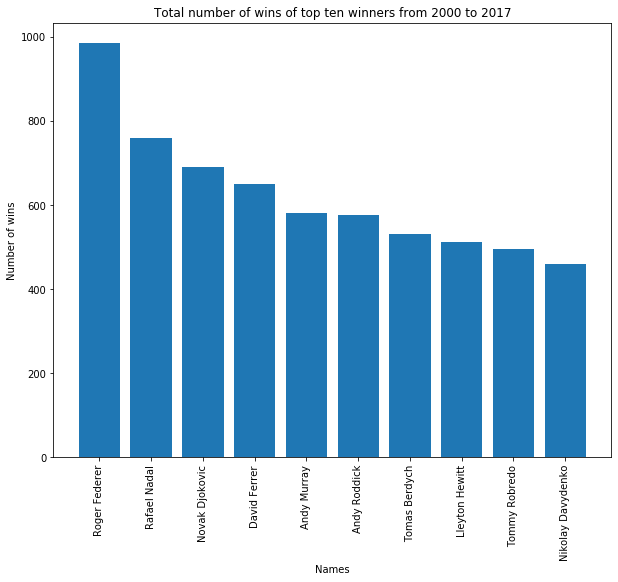

In [27]:
rcParams['figure.figsize'] = 10,8

plt.bar(x=Df.index, height=Df['winner_name']);
plt.xticks(rotation = 90)
plt.xlabel('Names')
plt.ylabel('Number of wins')
plt.title( 'Total number of wins of top ten winners from 2000 to 2017')

In [28]:
#creating dataframe of top ten winners
li = ('Roger Federer', 'Rafael Nadal', 'Novak Djokovic', 'David Ferrer', 'Andy Murray', 
      'Andy Roddick', 'Tomas Berdych', 'Lleyton Hewitt', 'Tommy Robredo', 'Nikolay Davydenko')
top = df[df['winner_name'].isin(li)]

In [29]:
L = df[df['winner_hand'] == 'L']['winner_name'].tolist()#saves all leftees in a list
R = df[df['winner_hand'] == 'R']['winner_name'].tolist()

#creating dataframe for by combining both hands
dfnew = pd.concat([pd.DataFrame(L, columns=['Left']), pd.DataFrame(R, columns=['Right'])], axis=1)

#getting unique number of left and right
l = dfnew.Left.unique()
r = dfnew.Right.unique()

#new dataframe from both uniques
dfneww = pd.concat([pd.DataFrame(l, columns=['Left']), pd.DataFrame(r, columns=['Right'])], axis=1)


In [30]:
#creating masks for top ten winners location
Roger_loc = df.winner_ioc[df.winner_name == 'Roger Federer'].values[0]
Rafeal_loc = df.winner_ioc[df.winner_name == 'Rafael Nadal'].values[0]
Novak_loc = df.winner_ioc[df.winner_name == 'Novak Djokovic'].values[0]
David_loc = df.winner_ioc[df.winner_name == 'David Ferrer'].values[0]
AndyR_loc = df.winner_ioc[df.winner_name == 'Andy Roddick'].values[0]
Lleyton_loc = df.winner_ioc[df.winner_name == 'Lleyton Hewitt'].values[0]
AndyM_loc = df.winner_ioc[df.winner_name == 'Andy Murray'].values[0]
Tommy_loc = df.winner_ioc[df.winner_name == 'Tommy Robredo'].values[0]
Tomas_loc = df.winner_ioc[df.winner_name == 'Tomas Berdych'].values[0]
Nikolay_loc = df.winner_ioc[df.winner_name == 'Nikolay Davydenko'].values[0]


In [31]:
#creating mask for top ten winners hand
Roger_hand = df.winner_hand[df.winner_name == 'Roger Federer'].values[0]
Rafeal_hand = df.winner_hand[df.winner_name == 'Rafael Nadal'].values[0]
Novak_hand = df.winner_hand[df.winner_name == 'Novak Djokovic'].values[0]
David_hand = df.winner_hand[df.winner_name == 'David Ferrer'].values[0]
AndyR_hand = df.winner_hand[df.winner_name == 'Andy Roddick'].values[0]
Lleyton_hand = df.winner_hand[df.winner_name == 'Lleyton Hewitt'].values[0]
AndyM_hand = df.winner_hand[df.winner_name == 'Andy Murray'].values[0]
Tommy_hand = df.winner_hand[df.winner_name == 'Tommy Robredo'].values[0]
Tomas_hand = df.winner_hand[df.winner_name == 'Tomas Berdych'].values[0]
Nikolay_hand = df.winner_hand[df.winner_name == 'Nikolay Davydenko'].values[0]


In [32]:
#creating mask for top ten winners height
Roger_ht = df.winner_ht[df.winner_name == 'Roger Federer'].values[0]
Rafeal_ht = df.winner_ht[df.winner_name == 'Rafael Nadal'].values[0]
Novak_ht = df.winner_ht[df.winner_name == 'Novak Djokovic'].values[0]
David_ht = df.winner_ht[df.winner_name == 'David Ferrer'].values[0]
AndyR_ht = df.winner_ht[df.winner_name == 'Andy Roddick'].values[0]
Lleyton_ht = df.winner_ht[df.winner_name == 'Lleyton Hewitt'].values[0]
AndyM_ht = df.winner_ht[df.winner_name == 'Andy Murray'].values[0]
Tommy_ht = df.winner_ht[df.winner_name == 'Tommy Robredo'].values[0]
Tomas_ht = df.winner_ht[df.winner_name == 'Tomas Berdych'].values[0]
Nikolay_ht = df.winner_ht[df.winner_name == 'Nikolay Davydenko'].values[0]


In [33]:
Top_10_location = {'location': (Roger_loc, Rafeal_loc, Novak_loc, David_loc, AndyR_loc, Lleyton_loc, 
                       AndyM_loc, Tommy_loc, Tomas_loc, Nikolay_loc)}
Top_10_location = pd.DataFrame(Top_10_location, index=('Roger', 'Rafeal', 'Novak', 'David', 'AndyR', 'Lleyton', 'AndyM', 'Tommy', 'Tomas', 'NIkolay'), columns=['location'])

Text(0.5, 1.0, 'Countries of the top ten winners')

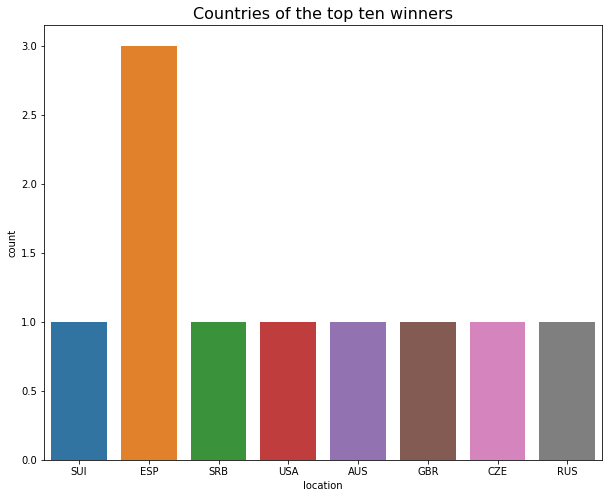

In [34]:
sns.countplot(data=Top_10_location, x = 'location')
plt.title('Countries of the top ten winners', fontsize=16)

In [35]:
Top_10_hand = {'hand': (Roger_hand, Rafeal_hand, Novak_hand, David_hand, AndyR_hand, Lleyton_hand, 
                       AndyM_hand, Tommy_hand, Tomas_hand, Nikolay_hand)}
Top_10_hand = pd.DataFrame(Top_10_hand, index=('Roger', 'Rafeal', 'Novak', 'David', 'AndyR', 'Lleyton', 'AndyM', 'Tommy', 'Tomas', 'NIkolay'), columns=['hand'])

Text(0.5, 1.015, 'Hand of the top ten winners')

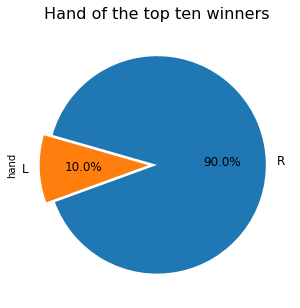

In [36]:
#Plot the pie chart for the top 10 hand
hand_stat = Top_10_hand.hand.value_counts()
hand_stat.plot(kind = 'pie', autopct= '%1.1f%%', startangle = 200, fontsize=12, figsize =(5,5),  explode = (0, 0.08))
plt.title('Hand of the top ten winners', fontsize=16, y=1.015)

#### total number of left hands

In [37]:
tl = 0
for i in dfneww.Left:
    if i is 'Nan':
        pass
    else:
        tl = tl+1
print('TOTAL NUMBER OF LEFT HANDED WINNERS: ', tl)

TOTAL NUMBER OF LEFT HANDED WINNERS:  540


#### total number of right hands

In [38]:
rl = 0
for i in dfneww.Right:
    if i is 'Nan':
        pass
    else:
        tl = tl+1
print('TOTAL NUMBER OF RIGHT HAANDED WINNERS: ', tl)

TOTAL NUMBER OF RIGHT HAANDED WINNERS:  1080


#### hand of top ten winners

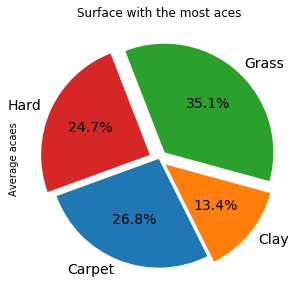

In [39]:
sur = top.groupby('surface')['w_ace'].mean()
rcParams['figure.figsize']= 15, 11
sur.plot(kind = 'pie', autopct= '%1.1f%%', startangle = 200, fontsize=14, figsize =(5,5), explode = (0, 0.08,0.08,0.09), title='Surface with the most aces');
plt.ylabel('Average acaes', fontsize=10);

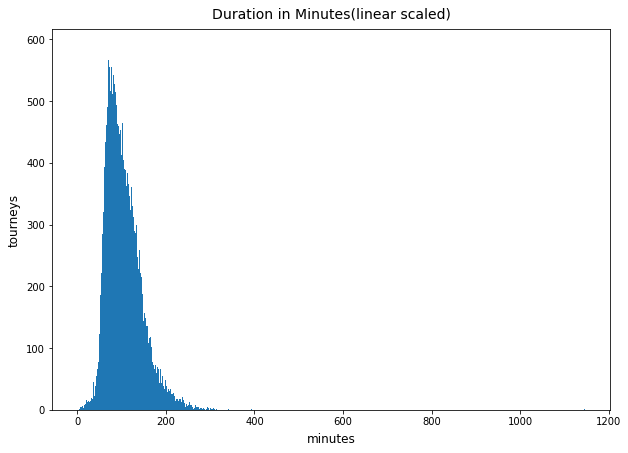

In [40]:
plt.figure(figsize=[10, 7])
bins = np.arange(0, df['minutes'].max()+1, 1)
plt.hist(data = df, x = 'minutes', bins=bins);
plt.title('Duration in Minutes(linear scaled)', fontsize=14, y=1.015)
plt.xlabel('minutes', labelpad=6, fontsize=12)
plt.ylabel('tourneys', labelpad=6, fontsize=12)
plt.show()

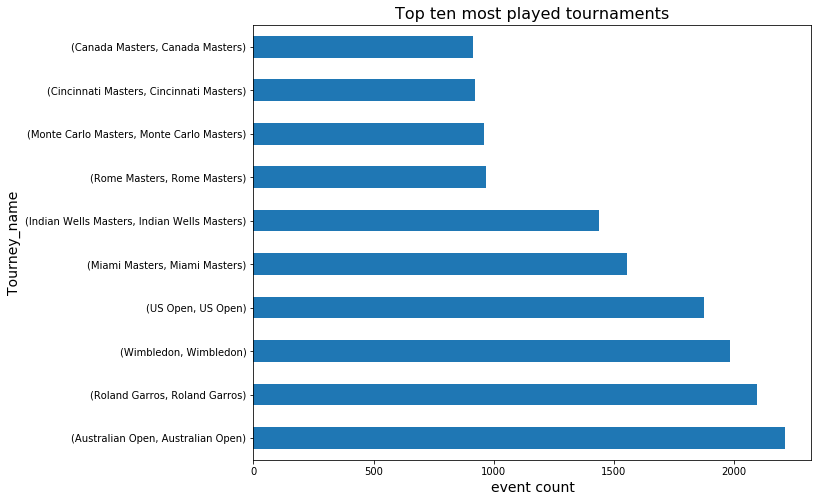

In [41]:
tt = pd.DataFrame(df.groupby('tourney_name')['tourney_name'].value_counts().sort_values(ascending= False))
ttp= pd.DataFrame(tt.head(n=10))
rcParams['figure.figsize']=10,8
ttp.plot(kind='barh', legend=False);
plt.ylabel('Tourney_name', fontsize=14)
plt.xlabel('event count', fontsize=14)
plt.title('Top ten most played tournaments',fontsize=16);

## Bivariate analysis

In [42]:
Roger_Federer=df[df['winner_name']=='Roger Federer']
Rafael_Nadal=df[df['winner_name']=='Rafael Nadal']
Novak_Djokovic=df[df['winner_name']=='Novak Djokovic']
David_Ferrer=df[df['winner_name']=='David Ferrer']
Andy_Murray=df[df['winner_name']=='Andy Murray']
Andy_Roddick=df[df['winner_name']=='Andy Roddick']
Tomas_Berdych=df[df['winner_name']=='Tomas Berdych']
Lleyton_Hewitt=df[df['winner_name']=='Lleyton Hewitt']
Tommy_Robredo=df[df['winner_name']=='Tommy Robredo']
Nikolay_Davydenko =df[df['winner_name']=='Nikolay Davydenko']
   
    

Roger_Federer=pd.DataFrame(Roger_Federer)
Rafael_Nadal=pd.DataFrame(Rafael_Nadal)
Novak_Djokovic=pd.DataFrame(Novak_Djokovic)
David_Ferrer=pd.DataFrame(David_Ferrer)
Andy_Murray=pd.DataFrame(Andy_Murray)
Andy_Roddick=pd.DataFrame(Andy_Roddick)
Tomas_Berdych=pd.DataFrame(Tomas_Berdych)
Lleyton_Hewitt=pd.DataFrame(Lleyton_Hewitt)
Tommy_Robredo=pd.DataFrame(Tommy_Robredo)
Nikolay_Davydenko=pd.DataFrame(Nikolay_Davydenko)


In [43]:
Australian=df[df['tourney_name']=='Australian Open']
Australian=Australian[['winner_name', 'tourney_name']].groupby('winner_name').count().sort_values('tourney_name', ascending=False)
Australian.loc['Tommy Robredo']
Australian.loc['Nikolay Davydenko']
Australian_8=(Australian.head(7)).append(Australian.loc['David Ferrer'])
Australian_9=Australian_8.append(Australian.loc['Tommy Robredo'])
Australian_10=Australian_9.append(Australian.loc['Nikolay Davydenko'])
Australian_10.columns=['Australian Open']
Australian_10 = Australian_10.loc[~Australian_10.index.duplicated(keep='first')]
Australian_10.sort_values('winner_name', ascending=True)


,Australian Open
winner_name,
Andy Murray,48
Andy Roddick,38
David Ferrer,41
Nikolay Davydenko,23
Novak Djokovic,58
Rafael Nadal,51
Roger Federer,87
Tomas Berdych,40
Tommy Robredo,21


In [44]:
Roland=df[df['tourney_name']=='Roland Garros']
Roland=Roland[['winner_name', 'tourney_name']].groupby('winner_name').count().sort_values('tourney_name', ascending=False)
Roland.loc['Tommy Robredo']
Roland.loc['Nikolay Davydenko']
Roland_8=(Roland.head(7)).append(Roland.loc['David Ferrer'])
Roland_9=Roland_8.append(Roland.loc['Tommy Robredo'])
Roland_10=Roland_9.append(Roland.loc['Nikolay Davydenko'])
Roland_10.columns=['Roland Garros']
Roland_10 = Roland_10.loc[~Roland_10.index.duplicated(keep='first')]
Roland_10.sort_values('winner_name', ascending=True)


,Roland Garros
winner_name,
Andy Murray,34
David Ferrer,43
Juan Carlos Ferrero,34
Nikolay Davydenko,26
Novak Djokovic,55
Rafael Nadal,72
Roger Federer,65
Tommy Robredo,36


In [45]:
Wimbledon=df[df['tourney_name']=='Wimbledon']
Wimbledon=Wimbledon[['winner_name', 'tourney_name']].groupby('winner_name').count().sort_values('tourney_name', ascending=False)
Wimbledon.loc['Tommy Robredo']
Wimbledon.loc['Nikolay Davydenko']
Wimbledon_8=(Wimbledon.head(7)).append(Wimbledon.loc['David Ferrer'])
Wimbledon_9=Wimbledon_8.append(Wimbledon.loc['Tommy Robredo'])
Wimbledon_10=Wimbledon_9.append(Wimbledon.loc['Nikolay Davydenko'])
Wimbledon_10.columns=['Wimbledon']
Wimbledon_10.sort_values('winner_name', ascending=True)


,Wimbledon
winner_name,
Andy Murray,48
Andy Roddick,41
David Ferrer,26
Lleyton Hewitt,39
Nikolay Davydenko,7
Novak Djokovic,47
Rafael Nadal,39
Roger Federer,78
Tomas Berdych,34


In [46]:
US_Open=df[df['tourney_name']=='US Open']
US_Open=US_Open[['winner_name', 'tourney_name']].groupby('winner_name').count().sort_values('tourney_name', ascending=False)
US_Open7=US_Open.head(7)
US_Open8=US_Open7.append(US_Open.loc['Tomas Berdych'])
US_Open9=US_Open8.append(US_Open.loc['Nikolay Davydenko'])
US_Open10=US_Open9.append(US_Open.loc['David Ferrer'])
US_Open10.columns=['US Open']

US_Open10.sort_values('winner_name', ascending=True)

,US Open
winner_name,
Andy Murray,37
Andy Roddick,43
David Ferrer,28
Lleyton Hewitt,44
Nikolay Davydenko,26
Novak Djokovic,50
Rafael Nadal,41
Roger Federer,72
Tomas Berdych,28


In [47]:
Top_tournament=[Australian_10, Roland_10, US_Open10, Wimbledon_10]
Tournament=pd.concat(Top_tournament, axis=1)

In [48]:
Tournament

,Australian Open,Roland Garros,US Open,Wimbledon
Roger Federer,87.0,65.0,72.0,78.0
Novak Djokovic,58.0,55.0,50.0,47.0
Rafael Nadal,51.0,72.0,41.0,39.0
Andy Murray,48.0,34.0,37.0,48.0
David Ferrer,41.0,43.0,28.0,26.0
Tomas Berdych,40.0,NaN,28.0,34.0
Andy Roddick,38.0,NaN,43.0,41.0
Tommy Robredo,21.0,36.0,33.0,14.0
Nikolay Davydenko,23.0,26.0,26.0,7.0
Juan Carlos Ferrero,NaN,34.0,NaN,NaN


In [49]:
Tournament = Tournament.drop(index="Juan Carlos Ferrero")

Text(0.5, 1.0, 'Top tournaments won by the top ten winners')

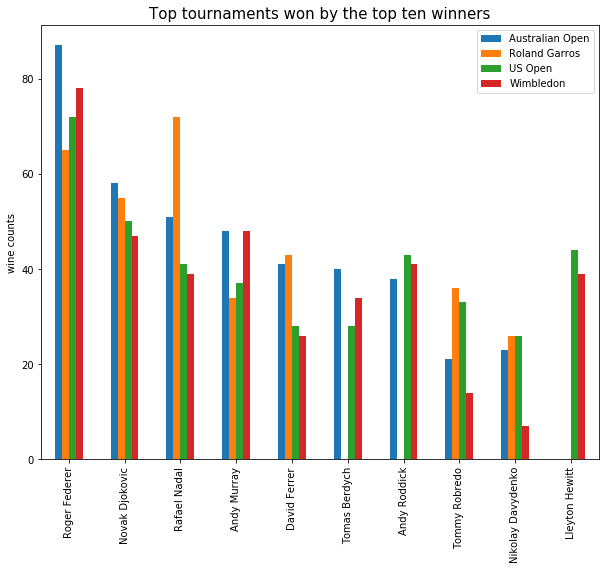

In [50]:
Tournament.plot.bar()
plt.ylabel('wine counts')
plt.title('Top tournaments won by the top ten winners', fontsize=15)

In [51]:
Roger_Federer=Roger_Federer['w_df'].describe()
Roger_Federer=pd.DataFrame(Roger_Federer)
Rafael_Nadal=Rafael_Nadal['w_df'].describe()
Rafael_Nadal=pd.DataFrame(Rafael_Nadal)
Novak_Djokovic=Novak_Djokovic['w_df'].describe()
Novak_Djokovic=pd.DataFrame(Novak_Djokovic)
David_Ferrer=David_Ferrer['w_df'].describe()
David_Ferrer=pd.DataFrame(David_Ferrer)
Andy_Murray=Andy_Murray['w_df'].describe()
Andy_Murray=pd.DataFrame(Andy_Murray)
Andy_Roddick=Andy_Roddick['w_df'].describe()
Andy_Roddick=pd.DataFrame(Andy_Roddick)
Tomas_Berdych=Tomas_Berdych['w_df'].describe()
Tomas_Berdych=pd.DataFrame(Tomas_Berdych)
Lleyton_Hewitt=Lleyton_Hewitt['w_df'].describe()
Lleyton_Hewitt=pd.DataFrame(Lleyton_Hewitt)
Tommy_Robredo=Tommy_Robredo['w_df'].describe()
Tommy_Robredo=pd.DataFrame(Tommy_Robredo)
Nikolay_Davydenko=Nikolay_Davydenko['w_df'].describe()
Nikolay_Davydenko=pd.DataFrame(Nikolay_Davydenko)
Overall_winner=df['w_df'].describe()
Overall_winner=pd.DataFrame(Overall_winner)

In [52]:
Top_ten_Df=[Roger_Federer,Rafael_Nadal,Novak_Djokovic, David_Ferrer, Andy_Murray, Andy_Roddick, Tomas_Berdych, Lleyton_Hewitt, Tommy_Robredo, Nikolay_Davydenko, Overall_winner]
Top_ten_Df=pd.concat(Top_ten_Df, axis=1)
Top_ten_Df.columns=['Roger', 'Rafael' ,'Novak', 'David', 'Andy_M', 'Andy_R', 'Tomas', 'Lleyton', 'Tommy', 'Nikolay', 'Average']
Top_ten_Df

,Roger,Rafael,Novak,David,Andy_M,Andy_R,Tomas,Lleyton,Tommy,Nikolay,Average
count,984.000000,759.000000,689.000000,650.000000,581.000000,575.000000,531.000000,511.000000,495.000000,459.000000,44310.000000
mean,1.650407,1.405797,2.137881,2.220000,2.342513,1.812174,2.224105,3.432485,2.248485,2.326797,2.626269
std,1.646149,1.354663,1.925163,1.866723,1.850834,1.697362,1.833818,2.459643,1.947923,1.782362,2.272073
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
50%,1.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2.000000,2.000000,2.000000
75%,2.000000,2.000000,3.000000,3.000000,3.000000,3.000000,3.000000,5.000000,3.000000,3.000000,4.000000
max,12.000000,8.000000,12.000000,11.000000,9.000000,14.000000,9.000000,13.000000,13.000000,10.000000,23.000000


Text(0.5, 1.0, 'Average double faults of top ten winners and all winners')

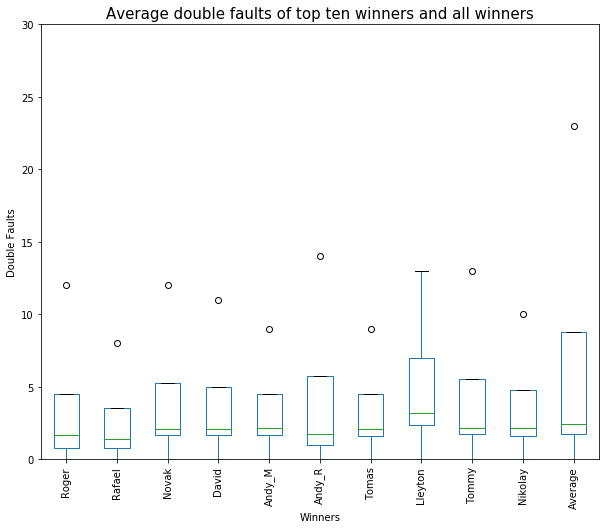

In [56]:
Top_ten_Df.plot.box();
plt.ylim(0,30)
plt.xticks(rotation=90)
plt.xlabel('Winners')
plt.ylabel('Double Faults')
plt.title('Average double faults of top ten winners and all winners', fontsize=15)

Text(0.5, 1.0, 'Surfaces with the most event')

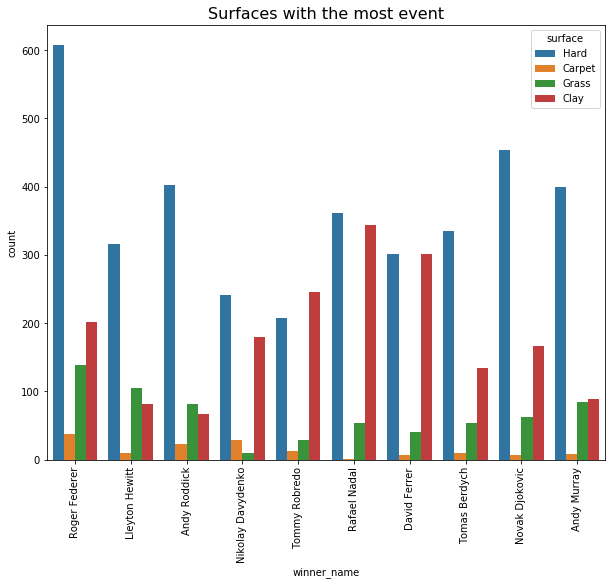

In [57]:
rcParams['figure.figsize']= 10, 8
sns.countplot(data=top, x=top['winner_name'], hue= 'surface');
plt.xticks(rotation='vertical');
plt.title('Surfaces with the most event',fontsize=16)

In [58]:
#making dataframe for top 10 winner height
Top_10_ht = {'height': (Roger_ht, Rafeal_ht, Novak_ht, David_ht, AndyR_ht, Lleyton_ht, 
                       AndyM_ht, Tommy_ht, Tomas_ht, Nikolay_ht),
            'name': ('Roger', 'Rafeal', 'Novak', 'David', 'AndyR', 'Lleyton', 'AndyM', 'Tommy', 'Tomas', 'NIkolay')}
Top_10_ht = pd.DataFrame(Top_10_ht)

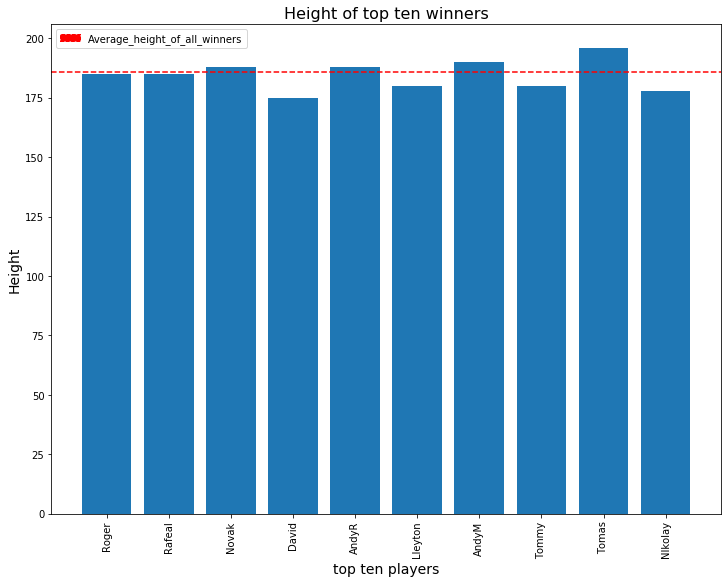

In [59]:
height_total_avr = round(df.winner_ht.mean(), 2)
x = Top_10_ht.name
y = Top_10_ht.height

plt.figure(figsize=(12, 9))
plt.xticks(rotation= 90)
plt.bar(x, y)
plt.axhline(y=height_total_avr, ls='--', color='red')
plt.ylabel('Height', fontsize=14)
plt.xlabel('top ten players', fontsize=14)
plt.title('Height of top ten winners', fontsize=16)
custom_legend = mpatches.Patch(color='r', label='Average_height_of_all_winners', ls='--')
plt.legend(handles=[custom_legend])

plt.show()

### Multivariate Analysis

#### SURFACES

In [60]:
#mask for top ten winners
Roger=df[df['winner_name']=='Roger Federer']
Rafael=df[df['winner_name']=='Rafael Nadal']
Novak=df[df['winner_name']=='Novak Djokovic']
R=df[df['winner_name']=='Roger Federer']
Rafael=df[df['winner_name']=='Rafael Nadal']
Novak=df[df['winner_name']=='Novak Djokovic']
Roger=df[df['winner_name']=='Roger Federer']
Rafael=df[df['winner_name']=='Rafael Nadal']
Novak=df[df['winner_name']=='Novak Djokovic']
Roger=df[df['winner_name']=='Roger Federer']

##### Roger

In [61]:
Roger_Clay=Roger[Roger['surface']=='Clay']
Roger_Hard=Roger[Roger['surface']=='Hard']
Roger_Grass=Roger[Roger['surface']=='Grass']
Roger_Carpet=Roger[Roger['surface']=='Carpet']
Roger_surface=[Roger_Clay['w_ace'].mean(), Roger_Hard['w_ace'].mean(),Roger_Grass['w_ace'].mean(),Roger_Carpet['w_ace'].mean() ]
Roger_surface=pd.DataFrame(Roger_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])

##### Rafael

In [62]:
Rafael_Clay=Rafael[Rafael['surface']=='Clay']
Rafael_Hard=Rafael[Rafael['surface']=='Hard']
Rafael_Grass=Rafael[Rafael['surface']=='Grass']
Rafael_Carpet=Rafael[Rafael['surface']=='Carpet']
Rafael_surface=[Rafael_Clay['w_ace'].mean(), Rafael_Hard['w_ace'].mean(),Rafael_Grass['w_ace'].mean(),Rafael_Carpet['w_ace'].mean()]
Rafael_surface=pd.DataFrame(Rafael_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])

##### Novak

In [63]:
Novak_Clay=Novak[Novak['surface']=='Clay']
Novak_Hard=Novak[Novak['surface']=='Hard']
Novak_Grass=Novak[Novak['surface']=='Grass']
Novak_Carpet=Novak[Novak['surface']=='Carpet']
Novak_surface=[Novak_Clay['w_ace'].mean(), Novak_Hard['w_ace'].mean(),Novak_Grass['w_ace'].mean(),Novak_Carpet['w_ace'].mean()]
Novak_surface=pd.DataFrame(Novak_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])


##### Overall Winner

In [64]:
Overall_Clay=df[df['surface']=='Clay']
Overall_Hard=df[df['surface']=='Hard']
Overall_Grass=df[df['surface']=='Grass']
Overall_Carpet=df[df['surface']=='Carpet']

Overall_surface=[Overall_Clay['w_ace'].mean(), Overall_Hard['w_ace'].mean(),Overall_Grass['w_ace'].mean(),Overall_Carpet['w_ace'].mean()]
Overall_surface=pd.DataFrame(Overall_surface, index=['Clay', 'Hard' ,'Grass','Carpet'], columns=['Average Aces'])

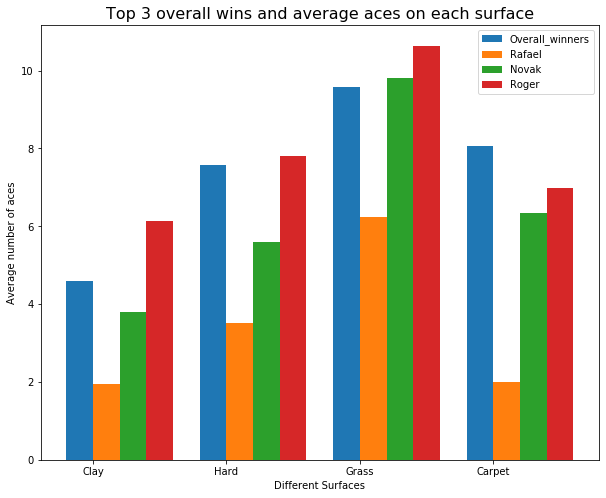

In [65]:
n=4
r=np.arange(n)
width=0.20

plt.bar(r, Overall_surface['Average Aces'], width, label='Overall_winners')
plt.bar(r+width, Rafael_surface['Average Aces'], width, label ='Rafael' )
plt.bar(r+width*2,Novak_surface['Average Aces'], width, label= 'Novak')
plt.bar(r+width*3, Roger_surface['Average Aces'], width, label='Roger')

plt.xlabel('Different Surfaces')
plt.ylabel('Average number of aces')
plt.title('Top 3 overall wins and average aces on each surface', fontsize=16)

plt.xticks(r +width/2,['Clay','Hard','Grass','Carpet'])
plt.legend()

In [66]:
Roger_bpFaced_age=Roger[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()
Rafael_bpFaced_age=Rafael[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()
Novak_bpFaced_age=Novak[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()
Overall_bpFaced_ace_age=df[['winner_age', 'w_bpFaced']].groupby('winner_age')['w_bpFaced'].mean()

Text(0.5, 1.0, 'Age versus the average number of breakpoints faced[top 3]')

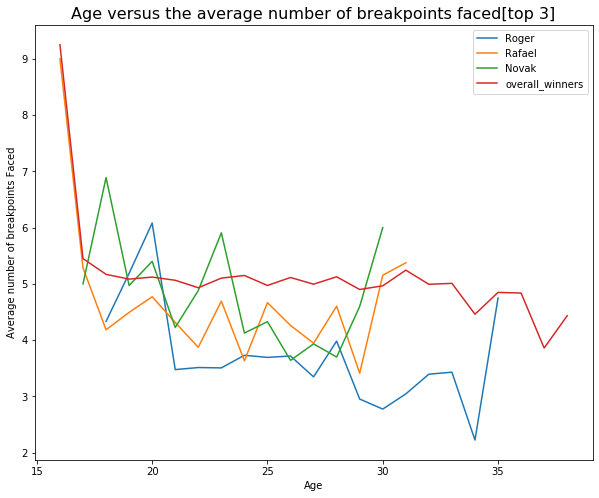

In [67]:
plt.plot(Roger_bpFaced_age, label='Roger')
plt.plot(Rafael_bpFaced_age, label='Rafael')
plt.plot(Novak_bpFaced_age, label='Novak')
plt.plot(Overall_bpFaced_ace_age, label='overall_winners')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Average number of breakpoints Faced')
plt.title('Age versus the average number of breakpoints faced[top 3]', fontsize=16)